In [1]:
import sys
import os
import glob as gb
sys.path.append('/home/cbenitez/')
import MTmp as mt
import matplotlib.pyplot as plt
import numpy as np
import oort_cons as oc

amrviewer GUI ImportError : are WxPython and PyTables correctly installed?


In [2]:
def bin_spread(MCMCrun,ivc):
    nsamples,flattened_chain = MCMCrun.Nwalkers*10, MCMCrun.sampler.get_chain(flat=True,discard=MCMCrun.burn_in)
    models = []
    draw = np.floor(np.random.uniform(0,len(flattened_chain),size=nsamples)).astype(int)
    thetas = flattened_chain[draw]
    fch = [oc.vr_model_ext,oc.vell_model_ext,oc.vb_model_ext][ivc]
    ll = np.linspace(-np.pi,np.pi,200)
    bb = np.linspace(MCMCrun.cc_galac[:,2].min(),MCMCrun.cc_galac[:,2].max(),10)
    for b in bb:
        mod = np.array([fch(c,MCMCrun.theta) for c in [[1.,l,b] for l in ll]])
        models.append(mod)
    spread_up = np.max(models,axis=0)
    spread_down = np.min(models,axis=0)
    med_model = np.median(models,axis=0)
    return med_model,spread_down,spread_up

In [19]:
def phase_space_bin(xxvvdd,cc_galac,vv_galac,dd,cc,vv,xvLSR,bb_bins,Mn,filename=None):
    fig, axs = plt.subplots(3, 3, sharex=False,figsize=(18,12))
    for ibin,bbin in zip(range(1,len(bb_bins)+1),bb_bins):
        b_min,b_max,bin_color = bbin
        cc_galac_bin = cc_galac[(cc_galac[:,2]<b_max) & (cc_galac[:,2]>=b_min)]
        vv_galac_bin = vv_galac[(cc_galac[:,2]<b_max) & (cc_galac[:,2]>=b_min)]
        dd_bin = dd[(cc_galac[:,2]<b_max) & (cc_galac[:,2]>b_min)]
        cc_bin = cc[(cc_galac[:,2]<b_max) & (cc_galac[:,2]>=b_min)]
        vv_bin = vv[(cc_galac[:,2]<b_max) & (cc_galac[:,2]>=b_min)]

        axs[0,0].scatter(cc_galac_bin[:,1],vv_galac_bin[:,0]/cc_galac_bin[:,0],s=map(int,np.log(dd_bin)*10),c=bin_color,alpha=.5,label=r"$M_{%g}^{%g}$"%(Mn,ibin))
        axs[1,0].scatter(cc_galac_bin[:,1],vv_galac_bin[:,1]/cc_galac_bin[:,0],s=map(int,np.log(dd_bin)*10),c=bin_color,alpha=.5,label=r"$M_{%g}^{%g}$"%(Mn,ibin))
        axs[2,0].scatter(cc_galac_bin[:,1],vv_galac_bin[:,2]/cc_galac_bin[:,0],s=map(int,np.log(dd_bin)*10),c=bin_color,alpha=.5,label=r"$M_{%g}^{%g}$"%(Mn,ibin))

        axs[0,1].scatter(cc_bin[:,0],cc_bin[:,1],s=map(int,np.log(dd_bin)*20),c=bin_color,alpha=.5)
        axs[1,1].scatter(cc_bin[:,0],cc_bin[:,2],s=map(int,np.log(dd_bin)*20),c=bin_color,alpha=.5)
        axs[2,1].scatter(cc_bin[:,1],cc_bin[:,2],s=map(int,np.log(dd_bin)*20),c=bin_color,alpha=.5)
        
        axs[0,2].scatter(cc_galac_bin[:,0]*np.cos(cc_galac_bin[:,2])*np.cos(cc_galac_bin[:,1]),cc_galac_bin[:,0]*np.cos(cc_galac_bin[:,2])*np.sin(cc_galac_bin[:,1]),s=map(int,np.log(dd_bin)*20),c=bin_color,alpha=.5)
        axs[1,2].scatter(cc_galac_bin[:,0]*np.cos(cc_galac_bin[:,2])*np.cos(cc_galac_bin[:,1]),cc_galac_bin[:,0]*np.sin(cc_galac_bin[:,2]),s=map(int,np.log(dd_bin)*20),c=bin_color,alpha=.5)
        axs[2,2].scatter(cc_galac_bin[:,0]*np.cos(cc_galac_bin[:,2])*np.sin(cc_galac_bin[:,1]),cc_galac_bin[:,0]*np.sin(cc_galac_bin[:,2]),s=map(int,np.log(dd_bin)*20),c=bin_color,alpha=.5)

    axs[0,1].scatter([xvLSR[0]],[xvLSR[1]],color="r",alpha=1,s=30,marker="X")
    axs[1,1].scatter([xvLSR[0]],[xvLSR[2]],color="r",alpha=1,s=30,marker="X")
    axs[2,1].scatter([xvLSR[1]],[xvLSR[2]],color="r",alpha=1,s=30,marker="X")

    axs[0,2].scatter([0],[0],color="r",alpha=1,s=30,marker="X")
    axs[1,2].scatter([0],[0],color="r",alpha=1,s=30,marker="X")
    axs[2,2].scatter([0],[0],color="r",alpha=1,s=30,marker="X")

    axs[0,0].locator_params(nbins=7)
    axs[1,0].locator_params(nbins=7)
    axs[2,0].locator_params(nbins=7)

    axs[0,0].set_ylabel('$v_r/r$\n[km s$^{-1}$ kpc$^{-1}$]',fontsize=24)
    axs[1,0].set_ylabel('$v_{\ell}/r$\n[km s$^{-1}$ kpc$^{-1}$]',fontsize=24)
    axs[2,0].set_ylabel('$v_{b}/r$\n[km s$^{-1}$ kpc$^{-1}$]',fontsize=24)
    axs[0,0].set_xlabel(r'$\ell$  [deg]',fontsize=24)
    axs[1,0].set_xlabel(r'$\ell$  [deg]',fontsize=24)
    axs[2,0].set_xlabel(r'$\ell$  [deg]',fontsize=24)

    axs[0,1].set_ylabel(r'$Y$ [kpc]',fontsize=24)
    axs[1,1].set_ylabel(r'$Z$ [kpc]',fontsize=24)
    axs[2,1].set_ylabel(r'$Z$ [kpc]',fontsize=24)
    axs[0,1].set_xlabel(r'$X$ [kpc]',fontsize=24)
    axs[1,1].set_xlabel(r'$X$ [kpc]',fontsize=24)
    axs[2,1].set_xlabel(r'$Y$ [kpc]',fontsize=24)

    axs[0,2].set_ylabel(r'$y$ [kpc]',fontsize=24)
    axs[1,2].set_ylabel(r'$z$ [kpc]',fontsize=24)
    axs[2,2].set_ylabel(r'$z$ [kpc]',fontsize=24)
    axs[0,2].set_xlabel(r'$x$ [kpc]',fontsize=24)
    axs[1,2].set_xlabel(r'$x$ [kpc]',fontsize=24)
    axs[2,2].set_xlabel(r'$y$ [kpc]',fontsize=24)

    axs[0,0].set_xticks([l for l in np.linspace(np.pi,-np.pi,7)])
    axs[0,0].set_xticklabels(labels=[str(int(l)) for l in np.linspace(180,-180,7)])
    axs[1,0].set_xticks([l for l in np.linspace(np.pi,-np.pi,7)])
    axs[1,0].set_xticklabels(labels=[str(int(l)) for l in np.linspace(180,-180,7)])
    axs[2,0].set_xticks([l for l in np.linspace(np.pi,-np.pi,7)])
    axs[2,0].set_xticklabels(labels=[str(int(l)) for l in np.linspace(180,-180,7)])

    for ax in axs.flatten():
        ax.tick_params(which='major',direction='in',right=True,top=True,length=6)
        ax.tick_params(which='minor',direction='in',right=True,top=True,length=4)
        
        ax.legend(loc="best")
        ax.xaxis.set_tick_params(labelsize=16)
        ax.yaxis.set_tick_params(labelsize=16)
    
    axs[0,1].plot([xvLSR[0],0],[xvLSR[1],0],color="k",linestyle="--",alpha=1)

    axs[0,0].set_ylim(-270,555)
    axs[1,0].set_ylim(-410,380)
    axs[2,0].set_ylim(-295,225)

    axs[0,1].axis('equal')
    axs[1,1].axis('equal')
    axs[2,1].axis('equal')
    
    axs[0,1].set_xlim(6.5,8)
    axs[1,1].set_xlim(6.5,8)
    axs[2,1].set_xlim(-1.2,.35)
    axs[0,1].set_ylim(-1.2,.35)
    axs[1,1].set_ylim(-.3,.2)
    axs[2,1].set_ylim(-.3,.2)

    axs[0,2].axis('equal')
    axs[1,2].axis('equal')
    axs[2,2].axis('equal')

    axs[0,2].set_xlim(-.6,.7)
    axs[1,2].set_xlim(-.6,.7)
    axs[2,2].set_xlim(-1,.55)
    axs[0,2].set_ylim(-1,.55)
    axs[1,2].set_ylim(-.3,.2)
    axs[2,2].set_ylim(-.3,.2)
    
    axs[0,0].invert_xaxis()
    axs[1,0].invert_xaxis()
    axs[2,0].invert_xaxis()
    
    plt.tight_layout()
    if filename!=None:
        plt.savefig(filename+".pdf", format='pdf',bbox_inches='tight')

In [20]:
def phase_space_binprev(xxvvdd,cc_galac,vv_galac,dd,cc,vv,xvLSR,binned_ids,colors,all_ids,Mn,filename=None):
    fig, axs = plt.subplots(3, 3, sharex=False,figsize=(18,12))
    for ibin,bin_ids,bin_color in zip(range(1,len(bb_bins)+1),binned_ids,colors):
         
        auxbola = [idc in bin_ids for idc in all_ids]
        cc_galac_bin = cc_galac[auxbola]
        vv_galac_bin = vv_galac[auxbola]
        dd_bin = dd[auxbola]
        cc_bin = cc[auxbola]
        vv_bin = vv[auxbola]

        axs[0,0].scatter(cc_galac_bin[:,1],vv_galac_bin[:,0]/cc_galac_bin[:,0],s=map(int,np.log(dd_bin)*10),c=bin_color,alpha=.5,label=r"$M_{%g}^{%g}$"%(Mn,ibin))
        axs[1,0].scatter(cc_galac_bin[:,1],vv_galac_bin[:,1]/cc_galac_bin[:,0],s=map(int,np.log(dd_bin)*10),c=bin_color,alpha=.5,label=r"$M_{%g}^{%g}$"%(Mn,ibin))
        axs[2,0].scatter(cc_galac_bin[:,1],vv_galac_bin[:,2]/cc_galac_bin[:,0],s=map(int,np.log(dd_bin)*10),c=bin_color,alpha=.5,label=r"$M_{%g}^{%g}$"%(Mn,ibin))

        axs[0,1].scatter(cc_bin[:,0],cc_bin[:,1],s=map(int,np.log(dd_bin)*20),c=bin_color,alpha=.5)
        axs[1,1].scatter(cc_bin[:,0],cc_bin[:,2],s=map(int,np.log(dd_bin)*20),c=bin_color,alpha=.5)
        axs[2,1].scatter(cc_bin[:,1],cc_bin[:,2],s=map(int,np.log(dd_bin)*20),c=bin_color,alpha=.5)

        axs[0,2].scatter(cc_galac_bin[:,0]*np.cos(cc_galac_bin[:,2])*np.cos(cc_galac_bin[:,1]),cc_galac_bin[:,0]*np.cos(cc_galac_bin[:,2])*np.sin(cc_galac_bin[:,1]),s=map(int,np.log(dd_bin)*20),c=bin_color,alpha=.5)
        axs[1,2].scatter(cc_galac_bin[:,0]*np.cos(cc_galac_bin[:,2])*np.cos(cc_galac_bin[:,1]),cc_galac_bin[:,0]*np.sin(cc_galac_bin[:,2]),s=map(int,np.log(dd_bin)*20),c=bin_color,alpha=.5)
        axs[2,2].scatter(cc_galac_bin[:,0]*np.cos(cc_galac_bin[:,2])*np.sin(cc_galac_bin[:,1]),cc_galac_bin[:,0]*np.sin(cc_galac_bin[:,2]),s=map(int,np.log(dd_bin)*20),c=bin_color,alpha=.5)        

    axs[0,1].scatter([xvLSR[0]],[xvLSR[1]],color="r",alpha=1,s=30,marker="X")
    axs[1,1].scatter([xvLSR[0]],[xvLSR[2]],color="r",alpha=1,s=30,marker="X")
    axs[2,1].scatter([xvLSR[1]],[xvLSR[2]],color="r",alpha=1,s=30,marker="X")

    axs[0,2].scatter([0],[0],color="r",alpha=1,s=30,marker="X")
    axs[1,2].scatter([0],[0],color="r",alpha=1,s=30,marker="X")
    axs[2,2].scatter([0],[0],color="r",alpha=1,s=30,marker="X")

    axs[0,0].locator_params(nbins=7)
    axs[1,0].locator_params(nbins=7)
    axs[2,0].locator_params(nbins=7)

    axs[0,0].set_ylabel('$v_r/r$\n[km s$^{-1}$ kpc$^{-1}$]',fontsize=24)
    axs[1,0].set_ylabel('$v_{\ell}/r$\n[km s$^{-1}$ kpc$^{-1}$]',fontsize=24)
    axs[2,0].set_ylabel('$v_{b}/r$\n[km s$^{-1}$ kpc$^{-1}$]',fontsize=24)
    axs[0,0].set_xlabel(r'$\ell$  [deg]',fontsize=24)
    axs[1,0].set_xlabel(r'$\ell$  [deg]',fontsize=24)
    axs[2,0].set_xlabel(r'$\ell$  [deg]',fontsize=24)

    axs[0,1].set_ylabel(r'$Y$ [kpc]',fontsize=24)
    axs[1,1].set_ylabel(r'$Z$ [kpc]',fontsize=24)
    axs[2,1].set_ylabel(r'$Z$ [kpc]',fontsize=24)
    axs[0,1].set_xlabel(r'$X$ [kpc]',fontsize=24)
    axs[1,1].set_xlabel(r'$X$ [kpc]',fontsize=24)
    axs[2,1].set_xlabel(r'$Y$ [kpc]',fontsize=24)

    axs[0,2].set_ylabel(r'$y$ [kpc]',fontsize=24)
    axs[1,2].set_ylabel(r'$z$ [kpc]',fontsize=24)
    axs[2,2].set_ylabel(r'$z$ [kpc]',fontsize=24)
    axs[0,2].set_xlabel(r'$x$ [kpc]',fontsize=24)
    axs[1,2].set_xlabel(r'$x$ [kpc]',fontsize=24)
    axs[2,2].set_xlabel(r'$y$ [kpc]',fontsize=24)    

    axs[0,0].set_xticks([l for l in np.linspace(np.pi,-np.pi,7)])
    axs[0,0].set_xticklabels(labels=[str(int(l)) for l in np.linspace(180,-180,7)])
    axs[1,0].set_xticks([l for l in np.linspace(np.pi,-np.pi,7)])
    axs[1,0].set_xticklabels(labels=[str(int(l)) for l in np.linspace(180,-180,7)])
    axs[2,0].set_xticks([l for l in np.linspace(np.pi,-np.pi,7)])
    axs[2,0].set_xticklabels(labels=[str(int(l)) for l in np.linspace(180,-180,7)])

    for ax in axs.flatten():
        ax.tick_params(which='major',direction='in',right=True,top=True,length=6)
        ax.tick_params(which='minor',direction='in',right=True,top=True,length=4)
        
        ax.legend(loc="best")
        ax.xaxis.set_tick_params(labelsize=16)
        ax.yaxis.set_tick_params(labelsize=16)

    axs[0,1].plot([xvLSR[0],0],[xvLSR[1],0],color="k",linestyle="--",alpha=1)

    axs[0,0].set_ylim(-270,555)
    axs[1,0].set_ylim(-410,380)
    axs[2,0].set_ylim(-295,225)

    axs[0,1].axis('equal')
    axs[1,1].axis('equal')
    axs[2,1].axis('equal')
    
    axs[0,1].set_xlim(6.5,8)
    axs[1,1].set_xlim(6.5,8)
    axs[2,1].set_xlim(-1.2,.35)
    axs[0,1].set_ylim(-1.2,.35)
    axs[1,1].set_ylim(-.3,.2)
    axs[2,1].set_ylim(-.3,.2)

    axs[0,2].axis('equal')
    axs[1,2].axis('equal')
    axs[2,2].axis('equal')

    axs[0,2].set_xlim(-.6,.7)
    axs[1,2].set_xlim(-.6,.7)
    axs[2,2].set_xlim(-1,.55)
    axs[0,2].set_ylim(-1,.55)
    axs[1,2].set_ylim(-.3,.2)
    axs[2,2].set_ylim(-.3,.2)

    axs[0,0].invert_xaxis()
    axs[1,0].invert_xaxis()
    axs[2,0].invert_xaxis()
    
    plt.tight_layout()
    if filename!=None:
        plt.savefig(filename+".pdf", format='pdf',bbox_inches='tight')

____

In [5]:
DFparts,DFlsrs = mt.read_dat("/fs/nas14/other0/cbenitez/partsSim/",'mp_marbles_15032021-003752') 

In [6]:
DFparts.creation_time=DFparts.creation_time*mt.C.s.express(mt.C.Myr)
DFlsrs.creation_time=DFlsrs.creation_time*mt.C.s.express(mt.C.Myr)

In [7]:
np.unique(DFparts["output"])

array([11, 12, 13, 14, 15, 16])

In [8]:
tt = np.unique(DFparts.creation_time)
delta_tt = np.diff(tt)
xv_LSRs = [np.array([ 7.31874645e+00,  1.68672635e-01,  0.00000000e+00,  1.63837225e-16,-7.10893683e-15,  0.00000000e+00])]
for dt in delta_tt:
    xv_LSR = xv_LSRs[-1]
    alpha = np.linalg.norm(xv_LSR[3::])/np.linalg.norm(xv_LSR[:3:])*(dt)*mt.C.Myr.express(mt.C.s)
    xv_LSR = list(oc.Rot_mat(-alpha,[0,0,1]).dot(xv_LSRs[-1][:3:]))
    xv_LSR.extend(mt.vel_circ(xv_LSR,mt.force_T))
    xv_LSR = np.array(xv_LSR)
    xv_LSRs.append(xv_LSR)

In [9]:
tt

array([ 3.25060325,  4.7216629 ,  6.45561442,  7.98573204,  9.55898311,
       11.13404672])

In [10]:
xv_LSRs

[array([ 7.31874645e+00,  1.68672635e-01,  0.00000000e+00,  1.63837225e-16,
        -7.10893683e-15,  0.00000000e+00]),
 array([ 7.31891031e+00, -1.61405962e-01,  0.00000000e+00, -1.56778869e-16,
        -7.10909599e-15, -0.00000000e+00]),
 array([ 7.30000000e+00, -5.50000000e-01,  0.00000000e+00, -5.34232916e-16,
        -7.09072780e-15, -0.00000000e+00]),
 array([ 7.26618505e+00, -8.91658470e-01,  0.00000000e+00, -8.66096917e-16,
        -7.05788223e-15, -0.00000000e+00]),
 array([ 7.21475414e+00, -1.24089597e+00,  0.00000000e+00, -1.20532267e-15,
        -7.00792571e-15, -0.00000000e+00]),
 array([ 7.14645945e+00, -1.58764522e+00,  0.00000000e+00, -1.54213152e-15,
        -6.94158886e-15, -0.00000000e+00])]

In [11]:
np.unique(DFparts.output)

array([11, 12, 13, 14, 15, 16])

____

In [12]:
MCMCfit13ttbin = np.load("/fs/nas14/other0/cbenitez/Notebooks/MCMCfit13ttbin.npy")
MCMCfit12ttbin = np.load("/fs/nas14/other0/cbenitez/Notebooks/MCMCfit12ttbin.npy")

In [13]:
np.shape(MCMCfit13ttbin),np.shape(MCMCfit12ttbin)

((2, 3), (3, 3))

In [14]:
for m in range(3):
    sp = ""        
    for t in range(3):
        
        for ocp in range(9):
            sp = sp+"&$"+str(np.round(MCMCfit12ttbin[t][m].theta[ocp],decimals=1))+"$ "
        sp = sp+"\\\\ \n"
        for ocp in range(9):
            sp = sp+"&$\pm"+str(np.round(MCMCfit12ttbin[t][m].std[ocp],decimals=1))+"$ "
        sp = sp+"\\\\ \n\n"
    print sp

&$12.6$ &$-9.3$ &$-0.8$ &$-0.7$ &$-2060.9$ &$-2033.5$ &$670.9$ &$675.0$ &$2061.6$ \\ 
&$\pm0.4$ &$\pm0.5$ &$\pm0.5$ &$\pm0.5$ &$\pm5.4$ &$\pm5.4$ &$\pm5.3$ &$\pm5.3$ &$\pm11.6$ \\ 

&$13.0$ &$-13.2$ &$1.7$ &$0.2$ &$-493.7$ &$-389.0$ &$201.0$ &$193.8$ &$405.5$ \\ 
&$\pm0.6$ &$\pm0.5$ &$\pm0.5$ &$\pm0.5$ &$\pm1.3$ &$\pm1.3$ &$\pm1.3$ &$\pm1.3$ &$\pm2.2$ \\ 

&$10.6$ &$-21.3$ &$-3.6$ &$3.3$ &$-305.4$ &$-166.1$ &$155.6$ &$135.1$ &$155.5$ \\ 
&$\pm0.6$ &$\pm0.6$ &$\pm0.6$ &$\pm0.6$ &$\pm1.1$ &$\pm1.1$ &$\pm1.1$ &$\pm1.0$ &$\pm1.9$ \\ 


&$15.8$ &$-6.7$ &$-1.0$ &$-3.6$ &$2585.5$ &$2566.0$ &$-908.1$ &$-902.0$ &$-2544.2$ \\ 
&$\pm0.4$ &$\pm0.4$ &$\pm0.4$ &$\pm0.5$ &$\pm5.2$ &$\pm5.2$ &$\pm4.9$ &$\pm4.9$ &$\pm9.4$ \\ 

&$8.5$ &$-17.0$ &$2.2$ &$-1.4$ &$-689.1$ &$-641.1$ &$315.0$ &$314.1$ &$746.8$ \\ 
&$\pm0.6$ &$\pm0.6$ &$\pm0.6$ &$\pm0.6$ &$\pm2.6$ &$\pm2.6$ &$\pm2.6$ &$\pm2.6$ &$\pm5.1$ \\ 

&$9.2$ &$-20.3$ &$2.0$ &$-9.9$ &$-329.1$ &$-281.0$ &$182.8$ &$190.9$ &$413.1$ \\ 
&$\pm0.6$ &$\pm0.6$ &

In [15]:
for m in range(3):
    sp = ""        
    for t in range(2):
        
        for ocp in range(9):
            sp = sp+"&$"+str(np.round(MCMCfit13ttbin[t][m].theta[ocp],decimals=1))+"$ "
        sp = sp+"\\\\ \n"
        for ocp in range(9):
            sp = sp+"&$\pm"+str(np.round(MCMCfit13ttbin[t][m].std[ocp],decimals=1))+"$ "
        sp = sp+"\\\\ \n"
    print sp

&$-5.8$ &$6.6$ &$-33.9$ &$29.4$ &$-1026.0$ &$-945.8$ &$428.6$ &$430.5$ &$1123.8$ \\ 
&$\pm0.7$ &$\pm0.7$ &$\pm0.7$ &$\pm0.7$ &$\pm6.2$ &$\pm6.3$ &$\pm5.4$ &$\pm5.5$ &$\pm11.9$ \\ 
&$8.8$ &$-15.1$ &$-6.3$ &$-7.6$ &$-336.7$ &$-335.9$ &$193.7$ &$226.5$ &$777.4$ \\ 
&$\pm0.6$ &$\pm0.6$ &$\pm0.6$ &$\pm0.6$ &$\pm2.1$ &$\pm2.1$ &$\pm2.1$ &$\pm2.1$ &$\pm5.3$ \\ 

&$-6.3$ &$7.6$ &$-31.7$ &$29.8$ &$-2778.5$ &$-2722.0$ &$1124.6$ &$1124.1$ &$2868.9$ \\ 
&$\pm0.7$ &$\pm0.7$ &$\pm0.7$ &$\pm0.7$ &$\pm21.0$ &$\pm21.2$ &$\pm20.8$ &$\pm20.9$ &$\pm42.5$ \\ 
&$8.4$ &$-17.7$ &$-7.7$ &$-0.4$ &$-396.8$ &$-415.7$ &$251.3$ &$280.5$ &$1010.1$ \\ 
&$\pm0.4$ &$\pm0.5$ &$\pm0.5$ &$\pm0.5$ &$\pm2.5$ &$\pm2.4$ &$\pm2.2$ &$\pm2.2$ &$\pm4.6$ \\ 

&$-46.1$ &$5.1$ &$-72.2$ &$87.5$ &$40.0$ &$134.0$ &$-38.1$ &$-66.1$ &$103.8$ \\ 
&$\pm0.5$ &$\pm0.5$ &$\pm0.5$ &$\pm0.6$ &$\pm10.3$ &$\pm10.1$ &$\pm8.8$ &$\pm8.8$ &$\pm19.0$ \\ 
&$-13.4$ &$-9.0$ &$-26.0$ &$33.2$ &$-346.2$ &$-323.5$ &$229.7$ &$229.6$ &$875.9$ \\ 
&$\pm0.4$ &$\

In [16]:
maxes = []
mines = []
for m in range(3):   
    for t in range(3):
        mcfit = MCMCfit12ttbin[t][m]
        maxes.append([max(mcfit.vv_galac[:,0]/mcfit.cc_galac[:,0]),\
                      max(mcfit.vv_galac[:,1]/mcfit.cc_galac[:,0]),\
                      max(mcfit.vv_galac[:,2]/mcfit.cc_galac[:,0]),\
                      max(mcfit.cc[:,0]),max(mcfit.cc[:,1]),max(mcfit.cc[:,2]),\
                      max(mcfit.cc_galac[:,0]*np.cos(mcfit.cc_galac[:,2])*np.cos(mcfit.cc_galac[:,1])),\
                      max(mcfit.cc_galac[:,0]*np.cos(mcfit.cc_galac[:,2])*np.sin(mcfit.cc_galac[:,1])),\
                      max(mcfit.cc_galac[:,0]*np.sin(mcfit.cc_galac[:,2]))]) 
        mines.append([min(mcfit.vv_galac[:,0]/mcfit.cc_galac[:,0]),\
                      min(mcfit.vv_galac[:,1]/mcfit.cc_galac[:,0]),\
                      min(mcfit.vv_galac[:,2]/mcfit.cc_galac[:,0]),\
                      min(mcfit.cc[:,0]),min(mcfit.cc[:,1]),min(mcfit.cc[:,2]),\
                      min(mcfit.cc_galac[:,0]*np.cos(mcfit.cc_galac[:,2])*np.cos(mcfit.cc_galac[:,1])),\
                      min(mcfit.cc_galac[:,0]*np.cos(mcfit.cc_galac[:,2])*np.sin(mcfit.cc_galac[:,1])),\
                      min(mcfit.cc_galac[:,0]*np.sin(mcfit.cc_galac[:,2]))]) 

In [17]:
maxes = np.array(maxes).T
mines = np.array(mines).T
[(min(mines[i]),max(maxes[i])) for i in range(len(maxes))]

[(-265.15469437758065, 552.5442478788641),
 (-408.7652674058136, 377.8746936184828),
 (-294.80848382043814, 221.08462850777605),
 (6.683368947877892, 7.767001463152912),
 (-1.1039910665339991, 0.2250000423856573),
 (-0.2028917760835384, 0.07500001412855184),
 (-0.45070721805092534, 0.6221861727367091),
 (-0.8316257141761937, 0.39420199116701965),
 (-0.2028917760835384, 0.07500001412855184)]

______

In [18]:
subDFs = [DFparts[(DFparts["output"]==opc)] for opc in [12,13,14]]
subDFs[1] = subDFs[1][(abs(subDFs[1].z)<.075)]
array_ids = np.array(subDFs[1].id)
for j in range(3):
    subDFs[j] = subDFs[j][[i in array_ids for i in subDFs[j].id]]

#subDFs = [DFparts[(DFparts["output"]==opc) & (DFparts.creation_time==tt[opc-11])] for opc in [11,12,13,14]]
xxvvdds = [np.array(subDF[['x','y','z','vx','vy','vz','dens']]) for subDF in subDFs]
print [len(xvd)  for xvd in xxvvdds]


ccc_galac = []
vvv_galac = []
ddd = []
for ic in range(3):
    xv_LSR = xv_LSRs[ic+1]
    xxvvdd = xxvvdds[ic]
    r_LSR = np.array(xv_LSR[:3:])
    v_LSR = np.array(xv_LSR[3::])*mt.C.kpc.express(mt.C.km)
    cc = np.array([xv[:3:] for xv in xxvvdd])
    vv = np.array([xv[3:6] for xv in xxvvdd])
    dd = np.array([xv[-1] for xv in xxvvdd])
    vvkm = vv*mt.C.kpc.express(mt.C.km)
    vv_galac = np.array([oc.vcart2vgalacticOC(cc[i],r_LSR,vvkm[i],v_LSR) for i in range(len(vvkm))])
    cc_galac = np.array([oc.cart2galactic(c,r_LSR) for c in cc])
    ccc_galac.append(cc_galac)
    vvv_galac.append(vv_galac)
    ddd.append(dd)

[384, 1731, 1731]


In [22]:
tc = 0
xxvvdd = xxvvdds[tc]
cc_galac,vv_galac = ccc_galac[tc],vvv_galac[tc]
dd = xxvvdd[:,-1]
cc = np.array([xv[:3:] for xv in xxvvdd])
vv = np.array([xv[3:6] for xv in xxvvdd])
xvLSR = xv_LSRs[tc+1]
bb_bins = [(min(cc_galac[:,2]),0,"red"),(0,.09,"blue"),(.09,max(cc_galac[:,2]),"green")]

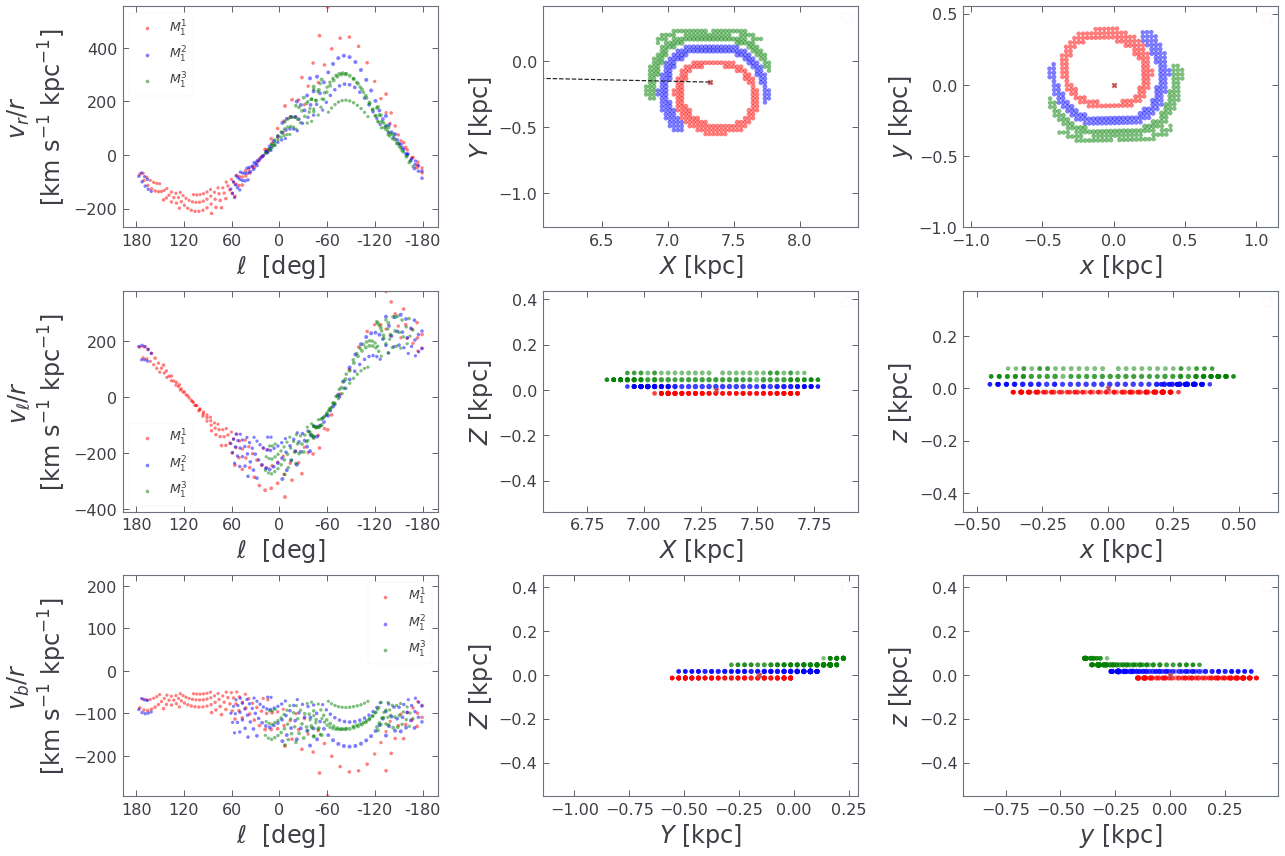

In [23]:
phase_space_bin(xxvvdd,cc_galac,vv_galac,dd,cc,vv,xvLSR,bb_bins,1,filename="phasespace_M1t1_fl")

In [24]:
binnesd_ids12 = []
for bbin in bb_bins:
    bin_ids = np.array(subDFs[tc].id[(bbin[0]<=cc_galac[:,2])&(cc_galac[:,2]<=bbin[1])])
    binnesd_ids12.append(bin_ids)

In [25]:
tc = 1
auxbola = [(idc in binnesd_ids12[0]) | \
           (idc in binnesd_ids12[1]) | \
           (idc in binnesd_ids12[2]) for idc in subDFs[tc].id]
xxvvdd = xxvvdds[tc]
cc_galac,vv_galac = ccc_galac[tc],vvv_galac[tc]
dd = xxvvdd[:,-1]
cc = np.array([xv[:3:] for xv in xxvvdd])
vv = np.array([xv[3:6] for xv in xxvvdd])
xvLSR = xv_LSRs[tc+1]

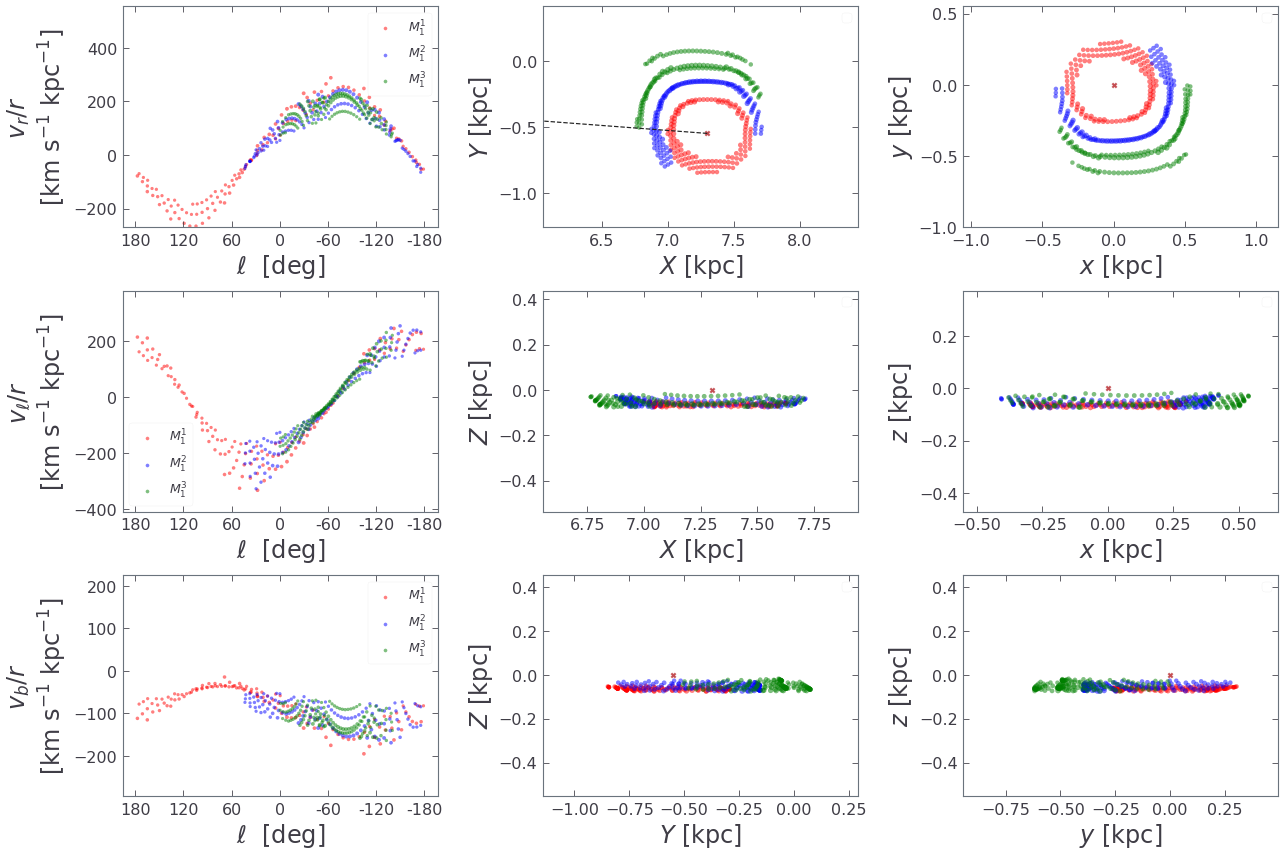

In [26]:
phase_space_binprev(xxvvdd[auxbola],\
                cc_galac[auxbola],\
                vv_galac[auxbola],\
                dd[auxbola],\
                cc[auxbola],\
                vv[auxbola],\
                xvLSR,binnesd_ids12,["red","blue","green"],np.array(subDFs[tc].id)[auxbola],1,filename="phasespace_M1t2_fl")

In [27]:
tc = 2

xxvvdd = xxvvdds[tc]
cc_galac,vv_galac = ccc_galac[tc],vvv_galac[tc]
dd = xxvvdd[:,-1]
cc = np.array([xv[:3:] for xv in xxvvdd])
vv = np.array([xv[3:6] for xv in xxvvdd])
xvLSR = xv_LSRs[tc+1]
auxbola = [(idc in binnesd_ids12[0]) | \
           (idc in binnesd_ids12[1]) | \
           (idc in binnesd_ids12[2]) for idc in subDFs[tc].id]

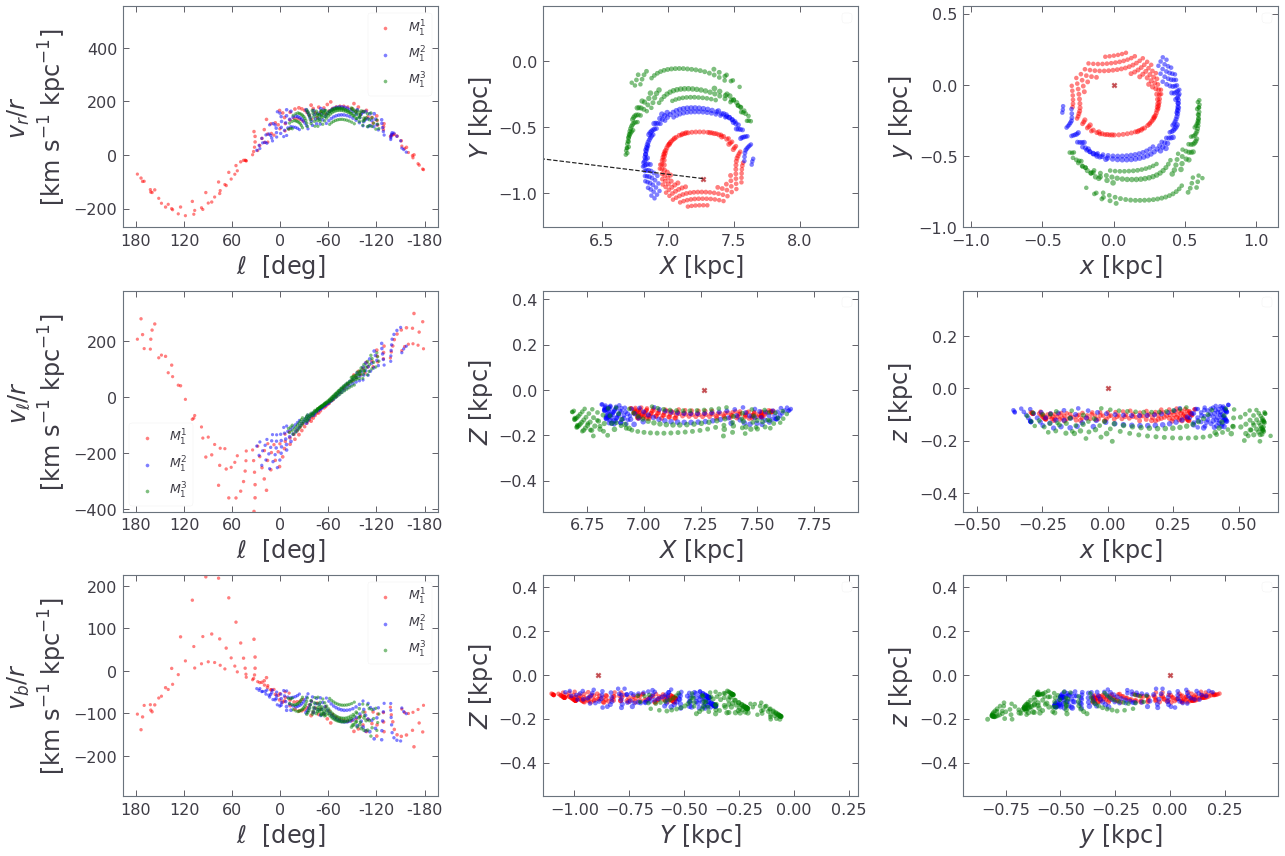

In [28]:
phase_space_binprev(xxvvdd[auxbola],\
                cc_galac[auxbola],\
                vv_galac[auxbola],\
                dd[auxbola],\
                cc[auxbola],\
                vv[auxbola],\
                xvLSR,binnesd_ids12,["red","blue","green"],np.array(subDFs[tc].id)[auxbola],1,filename="phasespace_M1t3_fl")

_____

In [29]:
tc = 1

xxvvdd = xxvvdds[tc]
cc_galac,vv_galac = ccc_galac[tc],vvv_galac[tc]
dd = xxvvdd[:,-1]
cc = np.array([xv[:3:] for xv in xxvvdd])
vv = np.array([xv[3:6] for xv in xxvvdd])
xvLSR = xv_LSRs[tc+1]
auxbola = [(idc not in binnesd_ids12[0]) & \
           (idc not in binnesd_ids12[1]) & \
           (idc not in binnesd_ids12[2]) for idc in subDFs[tc].id]
bb_bins = [(min(cc_galac[auxbola][:,2]),-.04,"red"),(-.04,.01,"blue"),(.01,max(cc_galac[:,2]),"green")]

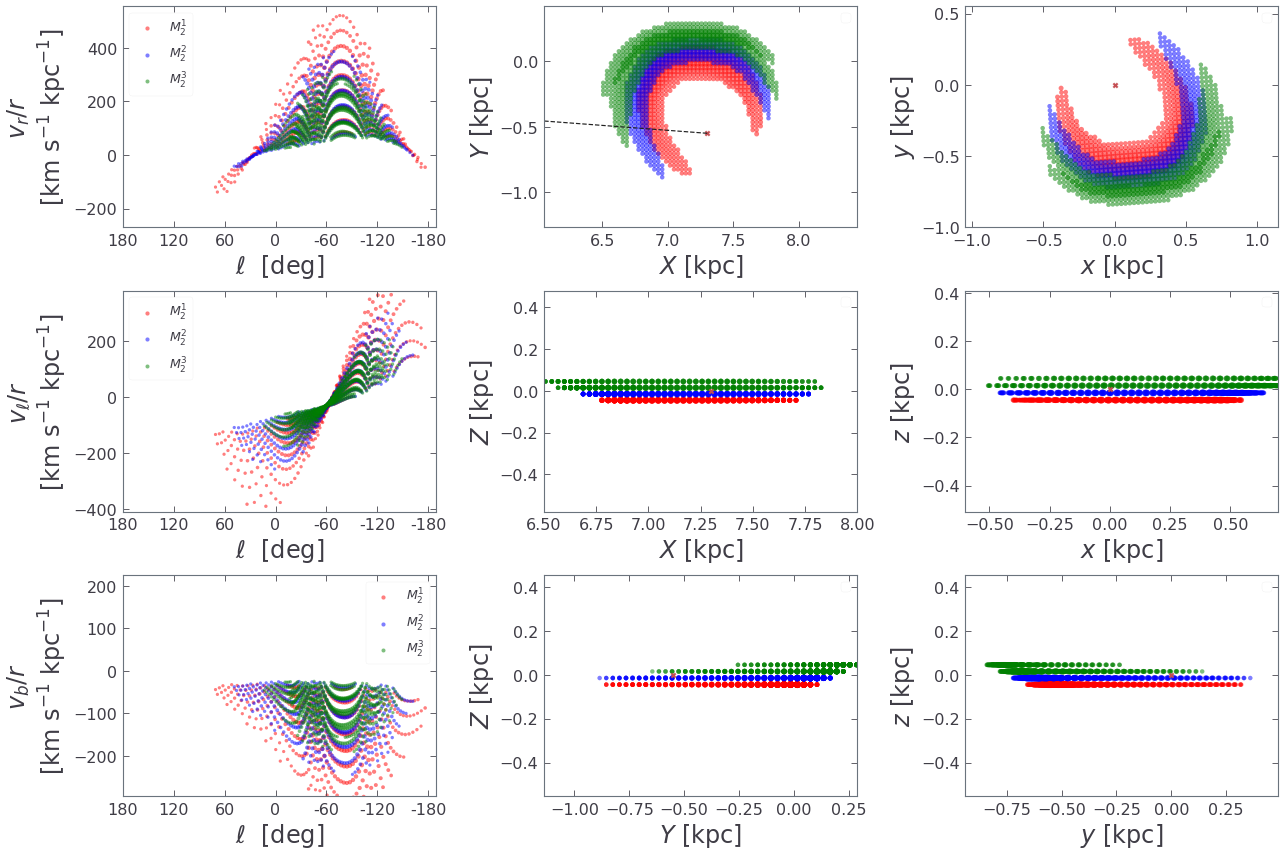

In [30]:
phase_space_bin(xxvvdd[auxbola],\
                cc_galac[auxbola],\
                vv_galac[auxbola],\
                dd[auxbola],\
                cc[auxbola],\
                vv[auxbola],\
                xvLSR,bb_bins,2,filename="phasespace_M2t2_fl")

In [31]:
binnesd_ids13 = []
for bbin in bb_bins:
    bin_ids = np.array(subDFs[tc].id[(bbin[0]<=cc_galac[:,2])&(cc_galac[:,2]<=bbin[1])])
    binnesd_ids13.append(bin_ids)

In [32]:
tc = 2

xxvvdd = xxvvdds[tc]
cc_galac,vv_galac = ccc_galac[tc],vvv_galac[tc]
dd = xxvvdd[:,-1]
cc = np.array([xv[:3:] for xv in xxvvdd])
vv = np.array([xv[3:6] for xv in xxvvdd])
xvLSR = xv_LSRs[tc+1]
auxbola = [(idc in binnesd_ids13[0]) | \
           (idc in binnesd_ids13[1]) | \
           (idc in binnesd_ids13[2]) for idc in subDFs[tc].id]

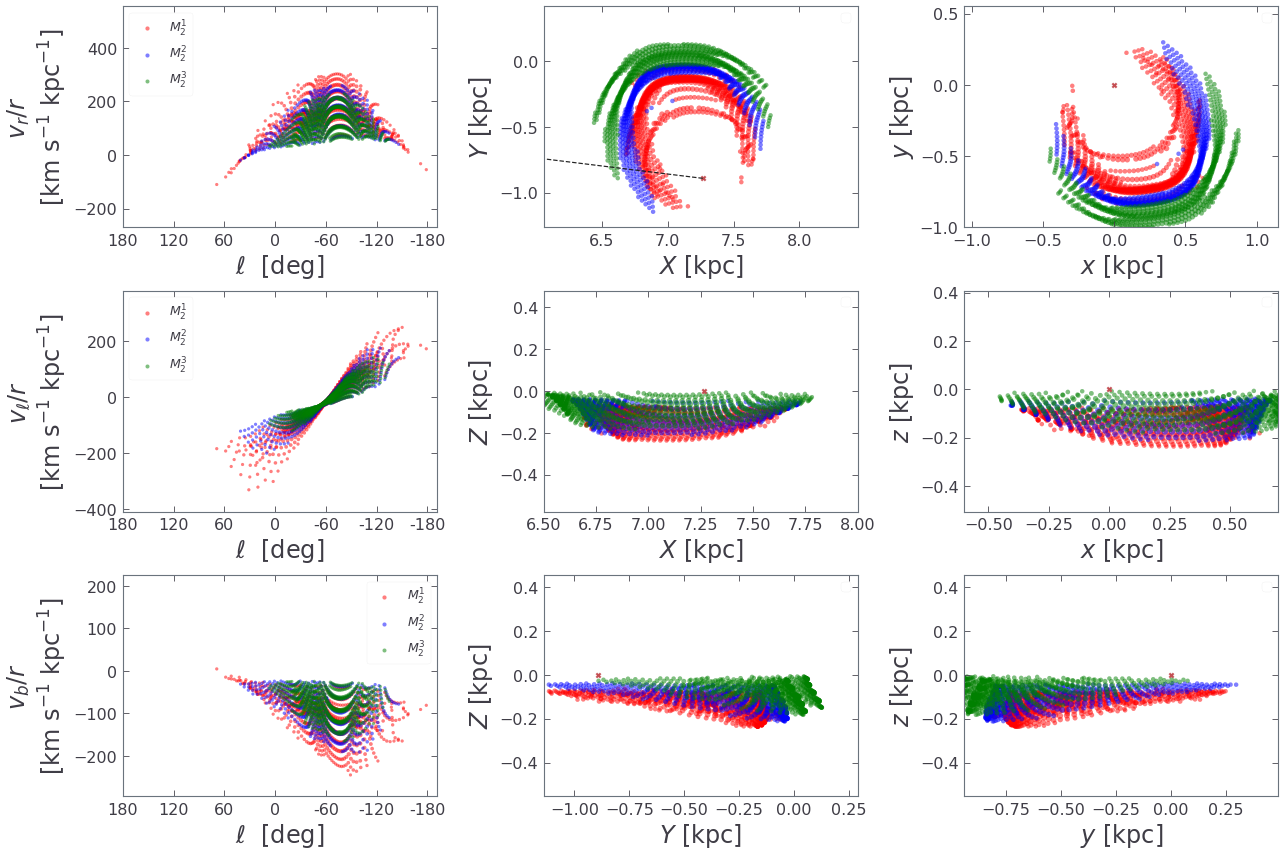

In [33]:
phase_space_binprev(xxvvdd[auxbola],\
                cc_galac[auxbola],\
                vv_galac[auxbola],\
                dd[auxbola],\
                cc[auxbola],\
                vv[auxbola],\
                xvLSR,binnesd_ids13,["red","blue","green"],np.array(subDFs[tc].id)[auxbola],2,filename="phasespace_M2t3_fl")

In [54]:
ls

curvas_rotacion.ipynb                         particulas 11-14.pdf
curvas_rotacion.pdf                           particulas XY 11-14.ipynb
densidades 11-14.ipynb                        phasespace_M1t1_fl.pdf
densidades 11-14_juntas.pdf                   phasespace_M1t1.pdf
densidades 11-14.pdf                          phasespace_M1t2_fl.pdf
densidad vs rz.ipynb                          phasespace_M1t2.pdf
densidad vs rz.pdf                            phasespace_M1t3_fl.pdf
desviaciones Theta.ipynb                      phasespace_M1t3.pdf
desviaciones Theta.pdf                        phasespace_M2t2_fl.pdf
exp1 ejemplo.ipynb                            phasespace_M2t2.pdf
exp1 ejemplo.pdf                              phasespace_M2t3_fl.pdf
line-clustering from saves - fixedlims.ipynb  phasespace_M2t3.pdf
line-clustering from saves.ipynb              primer contacto.ipynb
particulas 11-14.ipynb                        primer contacto.pdf
